<html>
<h1 style="text-align:center;color:red;background-color:powderblue;font-size:500%">Bike Rental Prediction</h1>
</html>

<html>
<img src="https://cdn.dribbble.com/users/196525/screenshots/2689989/media/bf383b711ae4a38444363bd75cb01352.gif" alt="Computer man" style="width:600px;height:250px;"/>
</html>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>Data Set Information:</b><br><br>
    Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
It is important to make the rental bike available and accessible to the public at the right time as 
it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes 
a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply 
of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.<br><br>
    <b>Attribute Information:</b><br>
    🔶Date : year-month-day<br>
🔶Rented Bike count - Count of bikes rented at each hour<br>
🔶Hour - Hour of he day<br>
🔶Temperature-Temperature in Celsius<br>
🔶Humidity - %<br>
🔶Windspeed - m/s<br>
🔶Visibility - 10m<br>
🔶Dew point temperature - Celsius<br>
🔶Solar radiation - MJ/m2<br>
🔶Rainfall - mm<br>
🔶Snowfall - cm<br>
🔶Seasons - Winter, Spring, Summer, Autumn<br>
🔶Holiday - Holiday/No holiday<br>
🔶Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)</p>

<html>
<h1 style="text-align:left;color:red;font-size:200%">Table of Contents : </h1>
</html>

  * [Data Manipulation](#sec1)
       * [Importing Libraries](#sec1.1)
       * [Importing Dataset](#sec1.2)
       * [Dataset View](#sec1.3)
       * [Dataset Information](#sec1.4)
       * [Change the data type](#sec1.5)
       * [Rename Features Names](#sec1.6)
       * [Summary Statistics](#sec1.7)
       * [Checking unique values in all attributes](#sec1.8)
       * [Checking missing values in each column](#sec1.9)
       * [percentage of missing values in each column](#sec1.10)
       
  * [Data Visualization](#sec2)
       * [Barplot of Hour Wise Distribution](#sec2.1)
       * [Analysing Categorical Variable](#sec2.2)
       * [Pie Chart](#sec2.2.a)
       * [Bar Chart](#sec2.2.b)
       * [Analysing Numerical Variable](#sec2.3)
       * [Density Plot](#sec2.3.a)
       * [Box Plot](#sec2.3.b)
       * [Power Transformation](#sec2.4)
       * [Density plot after applying Power Transformer](#sec2.4.a)
       * [Box plot after applying Power Transformer](#sec2.4.a)
       * [HeatMap](#sec2.5)
       
  * [Split Dependent and Independent variable](#sec3)
  * [Change categorical variables into dummies](#sec4)
  
  * [Variance Inflation Factor](#sec5)
       
  * [Splitting our dataset into train and test set](#sec6)
  
  * [Feature Scaling](#sec7)
       
  * [Modeling](#sec8)
       * [Linear Regression](#sec8.1)
       * [Linear Regression Summary](#sec8.1.1)
       * [Polynomial Regression](#sec8.2)
       * [Decision Tree Regresion](#sec8.3)
       * [Random Forest Regression](#sec8.4)
       
  * [Model Comparison](#sec9)

# Data Manipulation<a class="anchor" id="sec1"></a>

### Importing Libraries<a class="anchor" id="sec1.1"></a>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Importing dataset<a class="anchor" id="sec1.2"></a>

In [124]:
df=pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape', parse_dates=[0])

### Dataset View<a class="anchor" id="sec1.3"></a>

In [125]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes


### Dataset Information <a class="anchor" id="sec1.4"></a>

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Below we can see that :<br>
    *Total 14 columns and 8670 rows in a dataset.<br>
    *One feature is in <b>Date</b> type.<br>
    *Four Features are in <b>integer</b> data types.<br>
    *Six Features are in <b>float</b> data types.<br>
    *Three Features are in <b>object</b> data types</p>
</html>

### Change the data type for Hour feature. <a class="anchor" id="sec1.5"></a>

In [127]:
df=df.astype({'Hour':'object'})

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### Rename some of the feature names.<a class="anchor" id="sec1.6"></a>

In [129]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility',
                      'Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

### Summary Statistics<a class="anchor" id="sec1.7"></a>

In [130]:
df.describe()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,"8,760.00","8,760.00","8,760.00","8,760.00","8,760.00","8,760.00","8,760.00","8,760.00","8,760.00"
mean,704.60,12.88,58.23,1.72,"1,436.83",4.07,0.57,0.15,0.08
std,645.00,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,13.70,57.00,1.50,"1,698.00",5.10,0.01,0.00,0.00
75%,"1,065.25",22.50,74.00,2.30,"2,000.00",14.80,0.93,0.00,0.00
max,"3,556.00",39.40,98.00,7.40,"2,000.00",27.20,3.52,35.00,8.80


### Checking Unique Values in all attributes<a class="anchor" id="sec1.8"></a>

In [131]:
df.nunique().sort_values(ascending=False)

Rented Bike Count        2166
Visibility               1789
Dew point temperature     556
Temperature               546
Date                      365
Radiation                 345
Humidity                   90
Wind speed                 65
Rainfall                   61
Snowfall                   51
Hour                       24
Seasons                     4
Functioning Day             2
Holiday                     2
dtype: int64

### Checking missing values in each column<a class="anchor" id="sec1.9"></a>

In [132]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Below we can see that :<br>
    *There is no missing values in any features
</html>

### Percentage of missing values in each column<a class="anchor" id="sec1.10"></a>

In [133]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Date                    0.00 %
Rented Bike Count       0.00 %
Hour                    0.00 %
Temperature             0.00 %
Humidity                0.00 %
Wind speed              0.00 %
Visibility              0.00 %
Dew point temperature   0.00 %
Radiation               0.00 %
Rainfall                0.00 %
Snowfall                0.00 %
Seasons                 0.00 %
Holiday                 0.00 %
Functioning Day         0.00 %
dtype: float64


<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">
    *<b> Drop the Date Feature</b><br>
    *For prediction, there is no use of date feature. So, we drop the Date feature.
</html>

In [134]:
df=df.drop(['Date'],axis=1)
df.head(5)

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes


# Data Visualization<a class="anchor" id="sec2"></a>


### Barplot of Hour Wise Data Distribution<a class="anchor" id="sec2.1"></a>

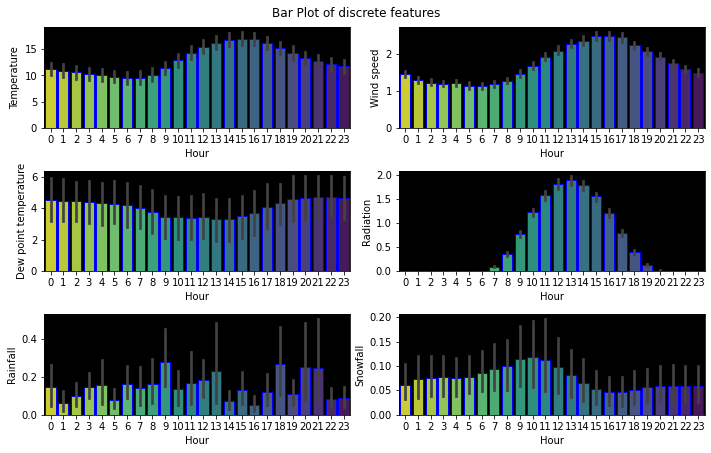

In [135]:
plt.figure(figsize=(10,10))
for i, feature in enumerate (df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax=plt.subplot(5,2, i+1 )
    sns.barplot(data=df, x='Hour', y=feature, edgecolor='blue', palette='viridis_r')
plt.suptitle('Bar Plot of discrete features')
plt.tight_layout()

## Analysing Categorical Feature<a class="anchor" id="sec2.2"></a>

###### Categorical Features

In [136]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == "object"]
categorical_feature

['Hour', 'Seasons', 'Holiday', 'Functioning Day']

### Pie Chart<a class="anchor" id="sec2.2.a"></a>

#### For Seasons

col_0    Counts
Seasons        
Autumn     2184
Spring     2208
Summer     2208
Winter     2160


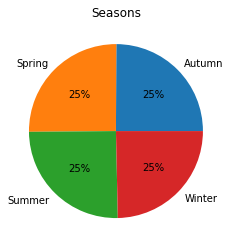

In [137]:
Seasons_Counts=pd.crosstab(df['Seasons'], columns='Counts')
print(Seasons_Counts)
plt.pie(Seasons_Counts['Counts'], labels=Seasons_Counts['Counts'].index, autopct='%.0f%%')
plt.title('Seasons')
plt.show()

#### For Functioning Day

col_0            Counts
Functioning Day        
No                  295
Yes                8465


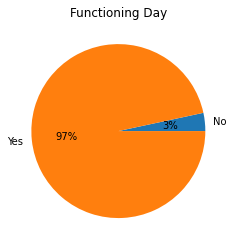

In [138]:
FunctioningDay_Counts=pd.crosstab(df['Functioning Day'], columns='Counts')
print(FunctioningDay_Counts)
plt.pie(FunctioningDay_Counts['Counts'], labels=FunctioningDay_Counts['Counts'].index, autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

#### For Holiday

col_0            Counts
Functioning Day        
No                  295
Yes                8465


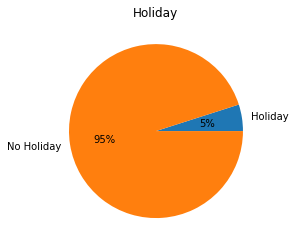

In [139]:
Holiday_Counts=pd.crosstab(df['Holiday'], columns='Counts')
print(FunctioningDay_Counts)
plt.pie(Holiday_Counts['Counts'], labels=Holiday_Counts['Counts'].index, autopct='%.0f%%')
plt.title('Holiday')
plt.show()

### Barplot<a class="anchor" id="sec2.2.b"></a>

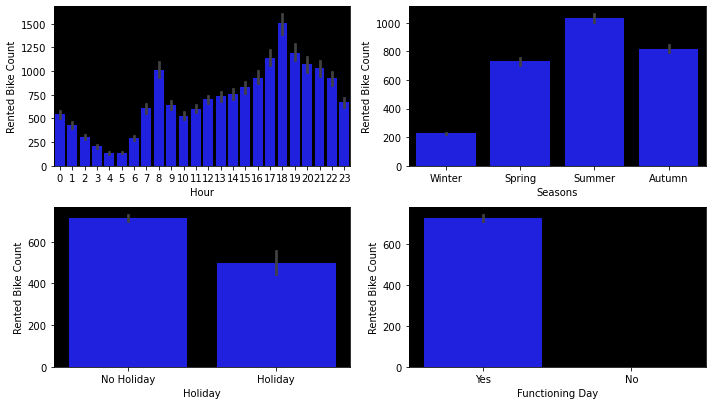

In [140]:
plt.figure(figsize=(10,50))
for i, feature in enumerate (categorical_feature):
    plt.rcParams['axes.facecolor'] = 'black'
    ax=plt.subplot(18,2, i+1 )
    sns.barplot(data=df, x=feature, y='Rented Bike Count', color='blue')
plt.tight_layout()

## Analysing Numerical Features<a class="anchor" id="sec2.3"></a>

###### Numerical Features

In [141]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != "object"]
numerical_feature

['Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Radiation',
 'Rainfall',
 'Snowfall']

### Density Plot<a class="anchor" id="sec2.3.a"></a>
<html>
<p style="color:chocolate;font-size:150%;">
    <b>Skewed Distribution-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <img src="https://www.ijamhrjournal.org/articles/2014/1/1/images/IntJAdvMedRes_2014_1_1_30_134449_u5.jpg" alt="Computer man" style="width:800px;height:300px;"/>
    <b>What is skewed distribution?</b><br>
    If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.<br>
    <b>Left Skewed or Negatively Skewed</b>:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean&lt;Median&lt;Mode)<br>
    <b>Right Skewed or Positively Skewed</b>:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean&gt;Median&gt;Mode)<br>
    <b>Symmetric Distribution:-</b>A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution
    </p>
</html>

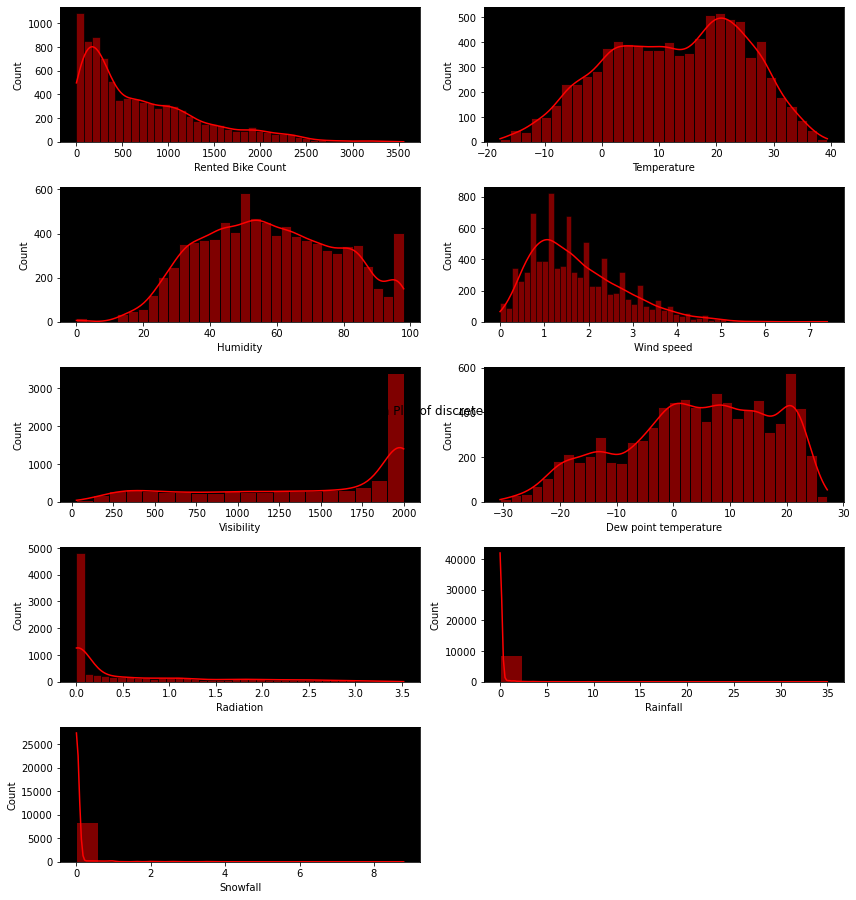

In [142]:
plt.figure(figsize=(12,300))
for i, feature in enumerate (numerical_feature):
    plt.rcParams['axes.facecolor'] = 'black'
    ax=plt.subplot(120,2, i+1 )
    sns.histplot(data=df, x=feature, ax=ax, color='red', kde=True)
plt.suptitle('Distribution Plot of discrete features')### Analysing Numerical Features
plt.tight_layout()

From the above density plot we can see that there are a lot of attributes which are positively or negatively distributed.

### Box plot <a class="anchor" id="sec2.3.b"></a>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Box Plot?</b><br>
    <img src="https://lh5.googleusercontent.com/Wz6lRE49LVUVq18MyNj6pEwDgdVcHhyDqaG5yGMQX36hy3ZGSyH7fs4A4nbJojGR58k=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.</p><br>
    <p style="border:4px solid violet;color:teal;background-color:tan;">
        <b>How to interpret boxplot</b><br>
    *Median: In the box plot, the median is displayed rather than the mean.<br>
    * Q1: The first quartile (25%) position.<br>
    * Q3: The third quartile (75%) position.<br>
    *  Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.<br>
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.<br>
    *  Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

</p>
</html>

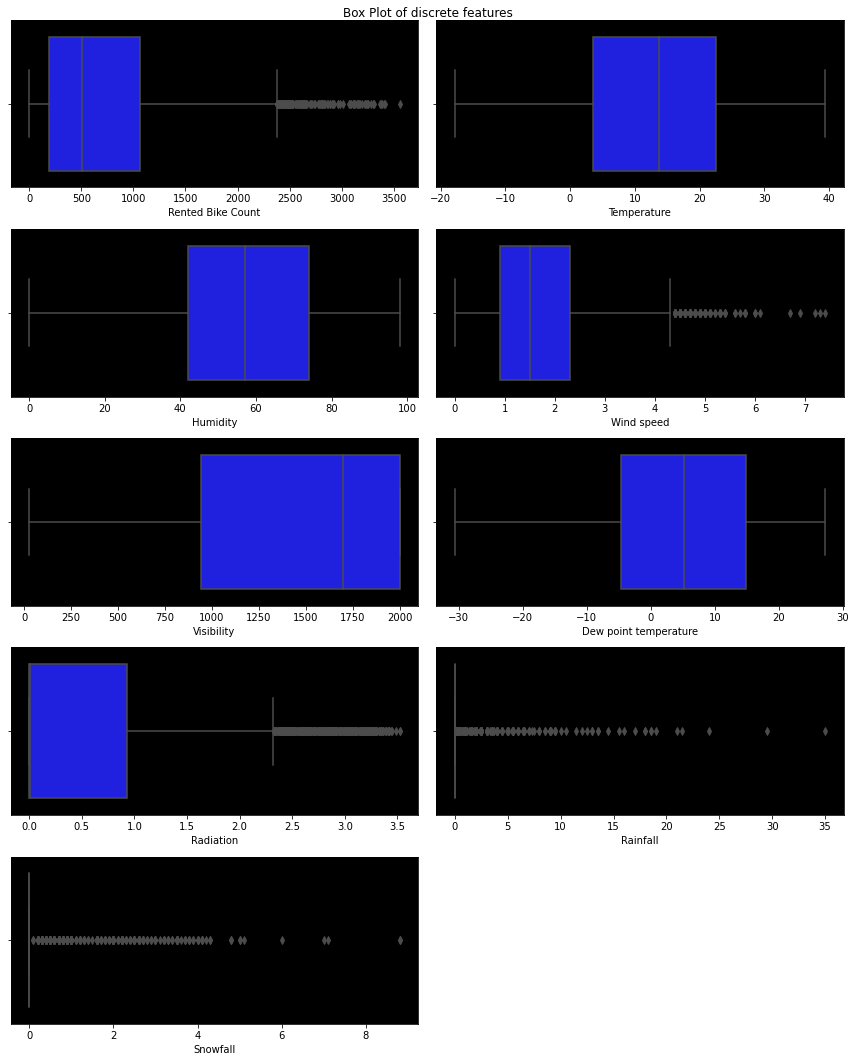

In [143]:
plt.figure(figsize=(12,15))
for i, feature in enumerate (numerical_feature):
    plt.rcParams['axes.facecolor'] = 'black'
    ax=plt.subplot(5,2, i+1 )
    sns.boxplot(data=df, x=feature, ax=ax, color='blue')
plt.suptitle('Box Plot of discrete features')
plt.tight_layout()

From the above box plot we can see that there are a lot of attributes which have outliers.

### Power Transformation<a class="anchor" id="sec2.4"></a>
<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Power transformation?</b><br>
    Power transforms are a technique for transforming numerical input or output variables to have a uniform or a Gaussian probability distribution. A power transform will make the probability distribution of a variable more Gaussian.</p><br>
    <p style="border:4px solid violet;color:teal;background-color:tan;">
     Power Transformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.</p><br>
    
</p>
</html>

In [144]:
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [145]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

## Data distribution after applying Power transformer

### Density plot after Power transformation<a class="anchor" id="sec2.4.a"></a>

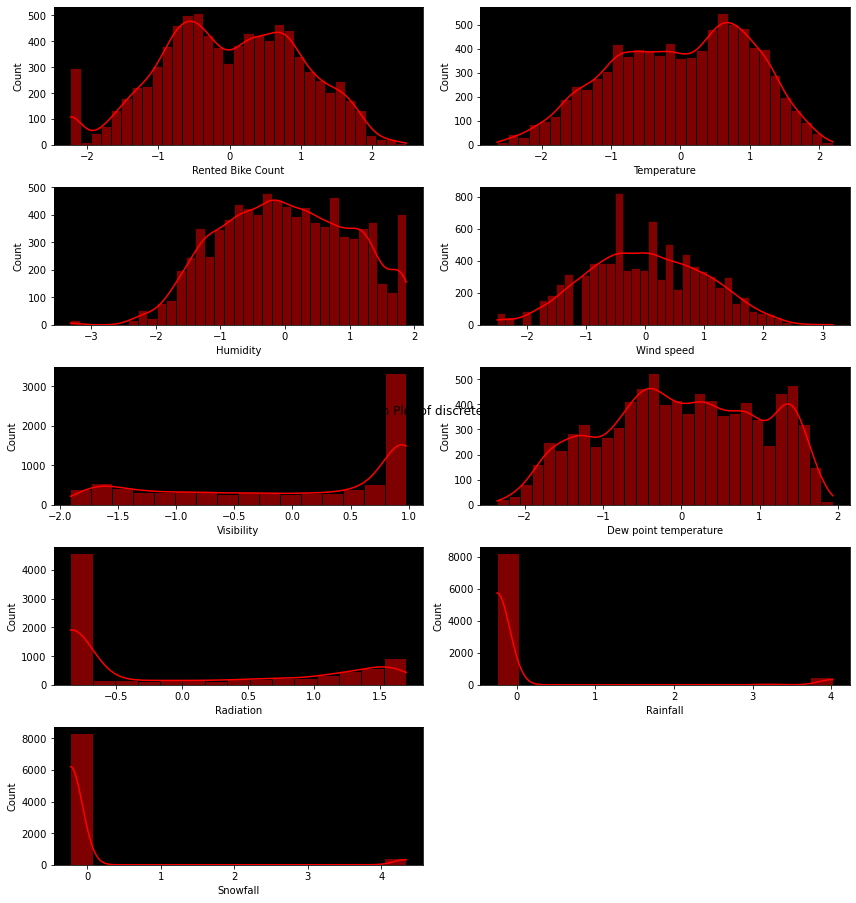

In [146]:
plt.figure(figsize=(12,300))
for i, feature in enumerate (numerical_feature):
    plt.rcParams['axes.facecolor'] = 'black'
    ax=plt.subplot(120,2, i+1 )
    sns.histplot(data=df, x=feature, ax=ax, color='red', kde=True)
plt.suptitle('Distribution Plot of discrete features')
plt.tight_layout()

### Boxplot after Power transformation<a class="anchor" id="sec2.4.b"></a>

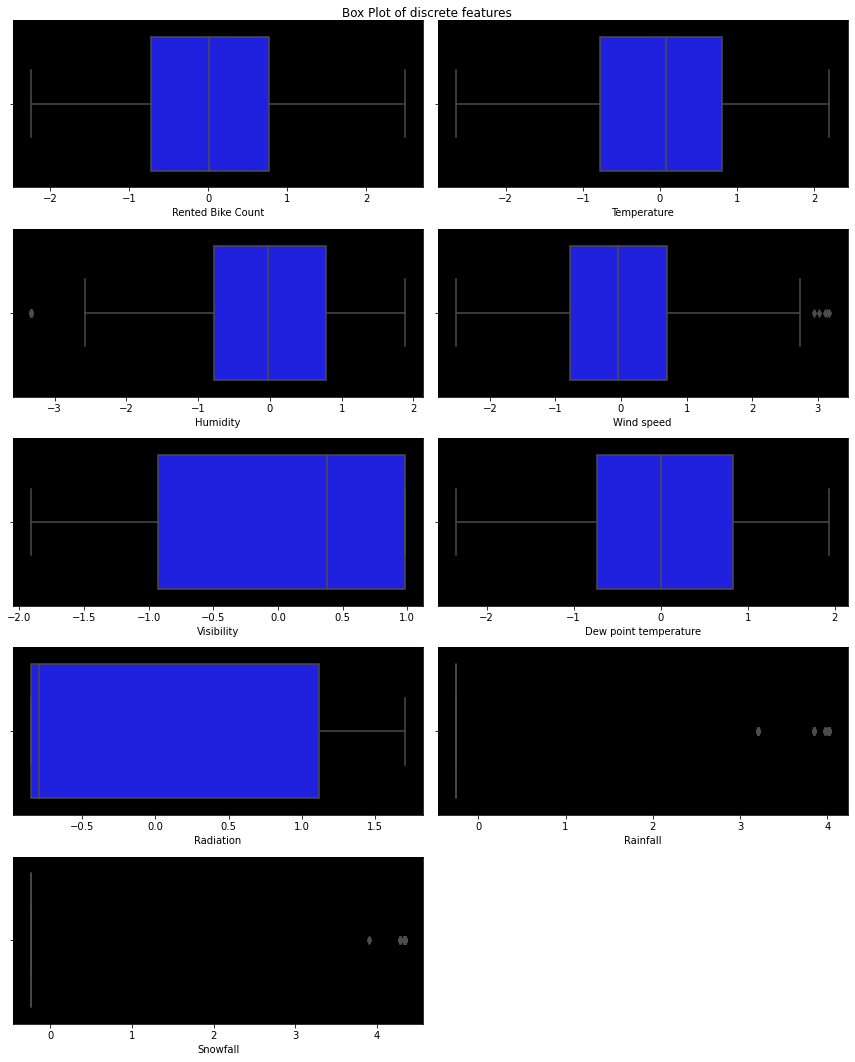

In [147]:
plt.figure(figsize=(12,15))
for i, feature in enumerate (numerical_feature):
    plt.rcParams['axes.facecolor'] = 'black'
    ax=plt.subplot(5,2, i+1 )
    sns.boxplot(data=df, x=feature, ax=ax, color='blue')
plt.suptitle('Box Plot of discrete features')
plt.tight_layout()

### Heat Map<a class="anchor" id="sec2.5"></a>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>Correlation Coefficient-</b></p>
    The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1.</p><br>
    <img src="https://lh6.googleusercontent.com/WJ-mqD3qf1j4DsE47HifHWf6d3H_2rrjbA0yVPpY-pIGapiZPX2uzM5l055oW-Nvp1U=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    
    
        
   
</html>

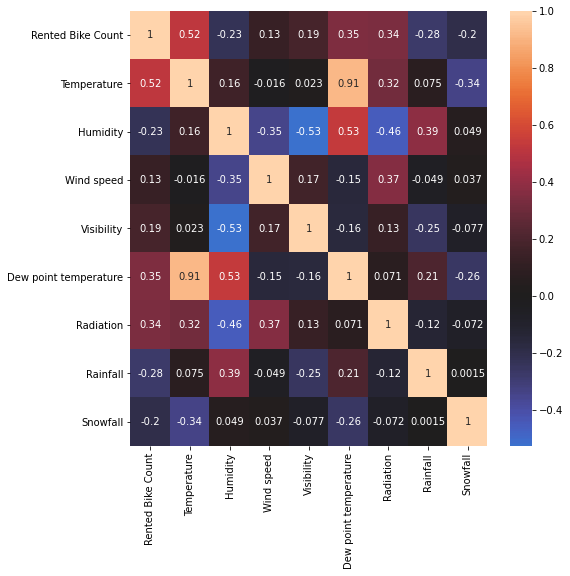

In [148]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Below we can see that :<br>
    *<b> From the above Heat Map</b><br>
    *We see that in our independent variable only <b>Temprature</b> is moderately correlated to <b>Rented Bike Count</b> and left of the variables have very low correlation with Rented Bike Count.<br>
    *<b>Dew point temperature</b> is highly correlated with <b>Temperature</b> and moderately correlated with <b>Humidity</b> which leads to multi collinearity.<br>
    *<b>Humidity</b> is also moderately correlated with <b>Visibility</b> and <b>Radiation</b>.<br>
</html>

### Split dependent and independent variable <a class="anchor" id="sec3"></a>

In [149]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [150]:
X.head(5)

,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,0,-1.52,-1.04,0.62,0.98,-1.56,-0.85,-0.25,-0.23,Winter,No Holiday,Yes
1,1,-1.55,-0.99,-0.92,0.98,-1.56,-0.85,-0.25,-0.23,Winter,No Holiday,Yes
2,2,-1.59,-0.93,-0.64,0.98,-1.56,-0.85,-0.25,-0.23,Winter,No Holiday,Yes
3,3,-1.61,-0.88,-0.78,0.98,-1.56,-0.85,-0.25,-0.23,Winter,No Holiday,Yes
4,4,-1.59,-1.09,0.70,0.98,-1.62,-0.85,-0.25,-0.23,Winter,No Holiday,Yes


### Change categorical variables into dummies<a class="anchor" id="sec4"></a>

In [151]:
X=pd.get_dummies(X,drop_first=True)
X.head(5)

,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,-1.52,-1.04,0.62,0.98,-1.56,-0.85,-0.25,-0.23,0,0,...,0,0,0,0,0,0,0,1,1,1
1,-1.55,-0.99,-0.92,0.98,-1.56,-0.85,-0.25,-0.23,1,0,...,0,0,0,0,0,0,0,1,1,1
2,-1.59,-0.93,-0.64,0.98,-1.56,-0.85,-0.25,-0.23,0,1,...,0,0,0,0,0,0,0,1,1,1
3,-1.61,-0.88,-0.78,0.98,-1.56,-0.85,-0.25,-0.23,0,0,...,0,0,0,0,0,0,0,1,1,1
4,-1.59,-1.09,0.70,0.98,-1.62,-0.85,-0.25,-0.23,0,0,...,0,0,0,0,0,0,0,1,1,1


## Variance Inflation Factor<a class="anchor" id="sec5"></a>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is VIF?</b><br>
    A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.<br>
    <img src="https://www.statisticshowto.com/wp-content/uploads/2015/09/variance-inflation-factor.png" alt="Computer man" style="width:200px;height:100px;"/><br>
    <b>A rule of thumb for interpreting the variance inflation factor:</b><br>
    👉 1 = not correlated.<br>
    👉 Between 1 and 5 = moderately correlated.<br>
    👉 Greater than 5 = highly correlated.
    </html>

In [152]:
vif_data = pd.DataFrame()
features=X.select_dtypes(include=['float','int'])

vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
print(vif_data)

                 feature   VIF
0            Temperature 45.79
1               Humidity 12.01
2             Wind speed  1.23
3             Visibility  1.56
4  Dew point temperature 60.27
5              Radiation  1.86
6               Rainfall  1.20
7               Snowfall  1.17


In [153]:
del X['Dew point temperature']

In [154]:
vif_data = pd.DataFrame()
features=X.select_dtypes(include=['float','int'])

vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
print(vif_data)

       feature  VIF
0  Temperature 1.56
1     Humidity 2.44
2   Wind speed 1.23
3   Visibility 1.50
4    Radiation 1.83
5     Rainfall 1.19
6     Snowfall 1.16


### Splitting our dataset into train and test set<a class="anchor" id="sec6"></a>

In [155]:
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

### Feature Scaling<a class="anchor" id="sec7"></a>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Normalization?</b><br>
    Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.<br>
    <img src="https://lh3.googleusercontent.com/q9a09LIGXoRO_1bdgFw0C3WcjyEhpDnJ3C8COL65yn0gWhRTtFm5US-Q33aAQujuETQ=w2400" alt="Computer man" style="width:800px;height:200px;"/>
    <b>What is Standardization?</b><br>
    Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
        <img src="https://lh6.googleusercontent.com/_y4dtry_8ImYjqLTXcH68ZpB1--Iea2n2m08d-GLpbTQ4VSREwy3v1PcX8dGQwLE9PE=w2400" alt="Computer man" style="width:800px;height:200px;"/></p>

#### Standardization

In [156]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Modelling<a class="anchor" id="sec8"></a>

<html>
    <p style="color:chocolate;font-size:150%;">
    <b>Performance Measures for Regression-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>R-Square:</b><br>
    R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.<br>
    R-squared is generally interpreted as the percentage.<br>
     <img src="https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-linear-regression-model-640x271.jpg" alt="Computer man" style="width:400px;height:100px;"/>
    <br>
    <b>Mean Square Error:</b><br>
    Mean squared error (MSE) measures error in statistical models by using the average squared difference between observed and predicted values.<br>
     It tells you how close a regression line is to a set of points.<br>
    <img src="https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG" alt="Computer man" style="width:400px;height:100px;"/>
    </p>
    </html>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>K-fold Cross validation-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Cross Validation?</b><br>
    Cross validation is a resampling method that uses different portions of the data to test and train the model on different iterations and average the overall accuracy and error estimate.<br>
It is mainly used when our goal is prediction or one wants to estimate how accurately a model will perform.<br>
    <img src="https://lh6.googleusercontent.com/sp2oloxXrxErMlLFkU3p0TqWYUh4O-9OjhQxBk8RcbKyYrxfPSSfGqw4KU61Vw_Qq7A=w2400" alt="Computer man" style="width:800px;height:400px;"/>
    </html>

###### Importing all the libraries for model fitting

In [157]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [158]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Linear Regression<a class="anchor" id="sec8.1"></a>

In [159]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Model_RSquare=r2_score(y_test,y_pred)*100
print("Model R-Square : {:.2f}%".format(Model_RSquare))
Model_MSE=mean_squared_error(y_test,y_pred)
print("Model MSE : {:.2f}".format(Model_MSE))
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)*100
MSE = cross_val_score(estimator = model, X = X_train, y = y_train, scoring ='neg_mean_squared_error' ,cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()))
print("Cross Val Standard Deviation: {:.2f} ".format(accuracies.std()))
print("Cross Val MSE: {:.2f} ".format(abs(MSE.mean())))
model_comparison['Linear Regression']=[Model_RSquare,Model_MSE,(accuracies.mean()),
                                       (accuracies.std()),(abs(MSE.mean()))]

Model R-Square : 80.76%
Model MSE : 0.19
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 
Cross Val MSE: 0.20 


### Linear Regression Summary<a class="anchor" id="sec8.1.1"></a>

In [160]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:50:51   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8            -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x9            -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x10           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x11           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x12           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x13           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x14            0.0035      0.008      0.438      0.661      -0.012       0.019
x15            0.0594      0.008      7.047      0.000       0.043       0.076
x16           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x17           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x18           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x19           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x20           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x21           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x22           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x23           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x24            0.0128      0.009      1.391      0.164      -0.005       0.031
x25            0.1193      0.008     14.495      0.000       0.103       0.135
x26            0.0908      0.008     11.289      0.000       0.075       0.107
x27            0.0832      0.008     10.710      0.000       0.068       0.098
x28            0.0975      0.008     12.277      0.000       0.082       0.113
x29            0.0698      0.008      8.942      0.000       0.055       0.085
x30            0.0129      0.008      1.675      0.094      -0.002       0.028
x31           -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x32           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x33           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x34            0.0513      0.006      8.986      0.000       0.040       0.063
x35            0.4646      0.006     79.193      0.000       

#### Assumptions of Linear Regression

In [161]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

##### Checking the mean is zero for residuals

In [162]:
np.mean(residuals)

0.010699177021444243

##### Checking for normality of the residuals

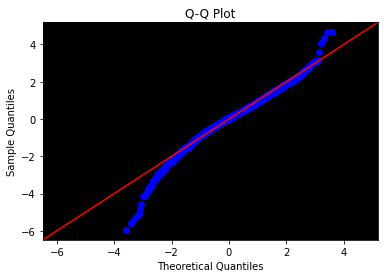

In [163]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

##### Checking for homoscedasticity

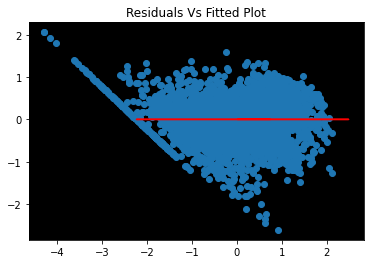

In [164]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

### Polynomial Regression<a class="anchor" id="sec8.2"></a>

In [165]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
Model_RSquare=r2_score(y_test,y_pred)*100
print("Model R-Square : {:.2f}%".format(Model_RSquare))
Model_MSE=mean_squared_error(y_test,y_pred)
print("Model MSE : {:.2f}".format(Model_MSE))
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)*100
MSE = cross_val_score(estimator = model, X = X_train, y = y_train, scoring ='neg_mean_squared_error' ,cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()))
print("Cross Val Standard Deviation: {:.2f} ".format(accuracies.std()))
print("Cross Val MSE: {:.2f} ".format(abs(MSE.mean())))
model_comparison['Polynomial Regression']=[Model_RSquare,Model_MSE,(accuracies.mean()),
                                           (accuracies.std()),(abs(MSE.mean()))]

Model R-Square : 88.66%
Model MSE : 0.11
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 
Cross Val MSE: 0.20 


### Decision Tree Regression<a class="anchor" id="sec8.3"></a>

In [166]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Model_RSquare=r2_score(y_test,y_pred)*100
print("Model R-Square : {:.2f}%".format(Model_RSquare))
Model_MSE=mean_squared_error(y_test,y_pred)
print("Model MSE : {:.2f}".format(Model_MSE))
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)*100
MSE = cross_val_score(estimator = model, X = X_train, y = y_train, scoring ='neg_mean_squared_error' ,cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()))
print("Cross Val Standard Deviation: {:.2f} ".format(accuracies.std()))
print("Cross Val MSE: {:.2f} ".format(abs(MSE.mean())))
model_comparison['Decision Tree Regression']=[Model_RSquare,Model_MSE,(accuracies.mean()),
                                              (accuracies.std()),(abs(MSE.mean()))]

Model R-Square : 79.27%
Model MSE : 0.21
Cross Val Accuracy: 78.96 %
Cross Val Standard Deviation: 1.30 
Cross Val MSE: 0.21 


### Random Forest Regression<a class="anchor" id="sec8.4"></a>

In [167]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Model_RSquare=r2_score(y_test,y_pred)*100
print("Model R-Square : {:.2f}%".format(Model_RSquare))
Model_MSE=mean_squared_error(y_test,y_pred)
print("Model MSE : {:.2f}".format(Model_MSE))
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)*100
MSE = cross_val_score(estimator = model, X = X_train, y = y_train, scoring ='neg_mean_squared_error' ,cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()))
print("Cross Val Standard Deviation: {:.2f} ".format(accuracies.std()))
print("Cross Val MSE: {:.2f} ".format(abs(MSE.mean())))
model_comparison['Random forest Regression']=[Model_RSquare,Model_MSE,(accuracies.mean()),
                                              (accuracies.std()),(abs(MSE.mean()))]

Model R-Square : 87.60%
Model MSE : 0.12
Cross Val Accuracy: 88.17 %
Cross Val Standard Deviation: 0.59 
Cross Val MSE: 0.12 


### Model Comparison<a class="anchor" id="sec9"></a>

In [168]:
Model_comparison=pd.DataFrame(model_comparison).T
Model_comparison.columns=['R-Square','MSE','CV Accuracy','CV Std. Dev.','CV MSE']
Model_comparison=Model_comparison.sort_values(by='R-Square',ascending=False)
Model_comparison

,R-Square,MSE,CV Accuracy,CV Std. Dev.,CV MSE
Polynomial Regression,88.66,0.11,80.35,0.59,0.20
Random forest Regression,87.60,0.12,88.17,0.59,0.12
Linear Regression,80.76,0.19,80.35,0.59,0.20
Decision Tree Regression,79.27,0.21,78.96,1.30,0.21
